# Encuesta Permanente de Hogares (EPH) INDEC, microdatos, como usar

Estandarizamos el formato y agrupamos los archivos en https://github.com/podemosaprender/data_indec_eph para que sea fácil consultar cualquier año. Los archivos se pueden concatenar, importar directamente con Pandas, y ocupan un tamaño pequeño.




In [1]:
import pandas as pd

In [6]:
EphUrlPfx= 'http://www.podemosaprender.org/data_indec_eph/' #U: prefijo URL para obtener datos

In [7]:
df= pd.read_csv(EphUrlPfx+'hogar/hogar_a15t1.tsv.gz', sep='\t') 
#U: pandas puede leer directamente separado por tabuladores y comprimido con gzip desde una url
#U: los archivos disponibles se pueden ver en el repo, hay "hogar", "indiv" y "notas" 
# con a(año dos digitos)t(nro trimestre) donde el primer trimestre es 1

df.head()

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,IV1_ESP,IV2,IV3,IV3_ESP,IV4,IV5,IV6,IV7,IV7_ESP,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II7_ESP,II8,...,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,DECIFR,IDECIFR,RDECIFR,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,IDIMPH
0,386698,1,1,2015,1,43,N,38,102,1,NaN,3,1,NaN,4,1,1,1,NaN,1,1,1,1,2,2,2,3,1,2,0,1,1,2,2,0,2,0,1,NaN,1,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,6000,3,3.0,3,NaN,3.0,3,6000.000000,8,8.0,8,NaN,8.0,8,1,0,98,0,0,0,0
1,386699,1,1,2015,1,40,N,25,132,1,NaN,3,1,NaN,2,2,1,1,NaN,1,1,1,1,2,2,2,3,2,2,0,1,2,2,2,0,2,0,1,NaN,2,...,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,3,0,3,12000,6,7.0,7,NaN,7.0,7,4000.000000,6,6.0,7,NaN,6.0,7,2,0,97,0,0,0,0
2,386702,2,1,2015,1,1,S,33,1934,2,NaN,2,1,NaN,9,1,1,1,NaN,1,1,1,1,2,2,2,3,2,2,0,1,2,2,2,0,2,0,3,NaN,2,...,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,5,2,3,21800,9,NaN,9,9.0,NaN,9,4360.000000,6,NaN,6,6.0,NaN,7,2,4,98,0,0,0,11000
3,386703,1,1,2015,1,43,N,6,149,1,NaN,3,1,NaN,4,2,1,1,NaN,1,1,1,3,2,2,2,2,2,2,0,1,2,2,2,0,2,0,1,NaN,2,...,2,2,1,2,2,2,2,1,1,1,2,2,2,2,2,2,3,1,2,2500,1,1.0,1,NaN,1.0,1,833.333333,1,1.0,1,NaN,1.0,1,2,0,3,0,0,0,10
4,386708,1,1,2015,1,43,S,4,944,1,NaN,5,1,NaN,2,1,1,1,NaN,1,1,1,1,2,2,2,5,1,1,1,1,1,2,2,0,2,0,1,NaN,1,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,8000,4,4.0,4,4.0,NaN,4,8000.000000,9,9.0,9,9.0,NaN,9,1,0,98,0,0,0,0


In [11]:

df.info() #U: las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18743 entries, 0 to 18742
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      18743 non-null  int64  
 1   NRO_HOGAR   18743 non-null  int64  
 2   REALIZADA   18743 non-null  int64  
 3   ANO4        18743 non-null  int64  
 4   TRIMESTRE   18743 non-null  int64  
 5   REGION      18743 non-null  int64  
 6   MAS_500     18743 non-null  object 
 7   AGLOMERADO  18743 non-null  int64  
 8   PONDERA     18743 non-null  int64  
 9   IV1         18743 non-null  int64  
 10  IV1_ESP     23 non-null     object 
 11  IV2         18743 non-null  int64  
 12  IV3         18743 non-null  int64  
 13  IV3_ESP     41 non-null     object 
 14  IV4         18743 non-null  int64  
 15  IV5         18743 non-null  int64  
 16  IV6         18743 non-null  int64  
 17  IV7         18743 non-null  int64  
 18  IV7_ESP     35 non-null     object 
 19  IV8         18743 non-nul

El significado de las columans se puede ver en el sitio de INDEC 
https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos

En el futuro podemos agregar más herramientas para simplificar este paso.

Por ejemplo [para 2010](https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_T1_2010.pdf)

* REGION
* AGLOMERADO
* IV1 tipo de vivienda
* IV2 cuantas habitaciones
* IV7 como recibe agua
* IV9 donde esta el baño (dentro, fuera)
* II7 1 Propietario vivienda y terreno, 2 solo vivienda, 3 inquilino, 4 ocupante ...
* IXTOT Cant de miembros del hogar
* ITF Ingreso total familiar

Miremos algunos datos

In [16]:
df.groupby('REGION').agg({'REGION': ['count']}) #U: cuantos hay de cada region? OjO con la representatividad.

,REGION
,count
REGION,
1,3427
40,3353
41,1778
42,1750
43,5884
44,2551


In [13]:
df.ITF.describe() #U: ingreso

count     18743.000000
mean      12828.726618
std       10710.774603
min           0.000000
25%        6000.000000
50%       10000.000000
75%       16500.000000
max      320500.000000
Name: ITF, dtype: float64

Tipo de vivienda
1 = Casa 2 = Departamento 3 = Pieza de inquilinato 4 = Pieza en hotel / pensión 5 = Local no construido para habitación 6 = Otros

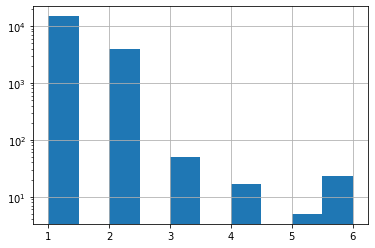

In [18]:
df.IV1.hist(log=True) #U: tipo de vivienda

Régimen de tenencia 1 = Propietario de la vivienda y el terreno 2 = Propietario de la vivienda solamente 3 = Inquilino / arrendatario de la vivienda 4 = Ocupante por pago de impuestos / expensas 5 = Ocupante en relación de dependencia 6 = Ocupante gratuito (con permiso) 7 = Ocupante de hecho (sin permiso) 8 = Está en sucesión 9 = Otra sit

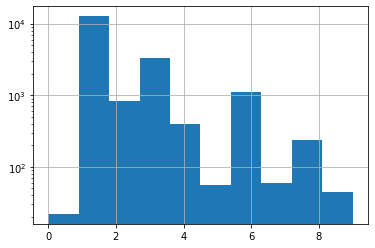

In [19]:
df.II7.hist(log=True) #U: tipo tenencia vivienda

IV9 (1)    El baño o letrina está... 1 = Dentro de la vivienda 2 = Fuera  de la vivienda pero dentro del terreno 3 = Fuera del terreno

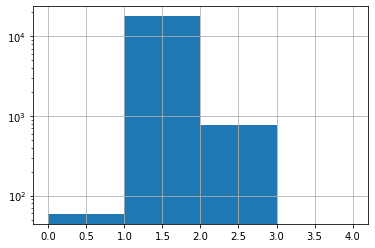

In [23]:
df.IV9.hist(log=True, bins=[0,1,2,3,4]) #U: baño, donde esta